In [ ]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
nobel = pd.read_csv('nobel.csv')
nobel.head(3)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany


In [ ]:
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

In [ ]:
nobel.describe()

,year,laureate_id
count,1000.000000,1000.000000
mean,1973.721000,509.099000
std,34.523195,298.130617
min,1901.000000,1.000000
25%,1949.750000,250.750000
50%,1979.000000,500.500000
75%,2003.000000,764.250000
max,2023.000000,1034.000000


In [ ]:
nobel.shape

(1000, 18)

In [ ]:
# extract the top value from sex
top_gender = nobel['sex'].value_counts(sort = True).idxmax()
#top_gender.idxmax()
top_gender

'Male'

In [ ]:
# extract the top value from birth_country
top_country = nobel['birth_country'].value_counts(sort= True).idxmax()
top_country

'United States of America'

In [ ]:
# create a new column for winners whose birth country is "United States of America"
nobel["US_born_winners"] = nobel['birth_country'] == 'United States of America'

In [ ]:
# create a decade column
nobel['decade'] = nobel['year'] // 10 * 10

In [ ]:
#	find the ratio
US_winners_ratio = nobel.groupby('decade')['US_born_winners'].mean()
US_winners_ratio

,US_born_winners
decade,
1900,0.017544
1910,0.075000
1920,0.074074
1930,0.250000
1940,0.302326
1950,0.291667
1960,0.265823
1970,0.317308
1980,0.319588


In [ ]:
# Identify the decade with the highest ratio of US-born winners
max_decade_usa = US_winners_ratio.sort_values(ascending=False)
max_decade_usa = US_winners_ratio.idxmax()
print(max_decade_usa)

2000

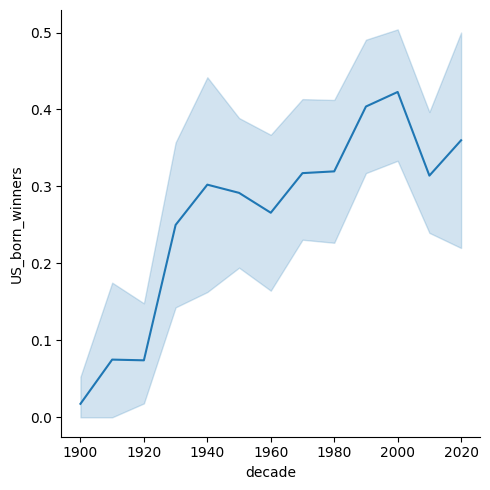

In [ ]:
# Create a relational line plot
sns.relplot(x='decade', y='US_born_winners', kind='line', data=nobel)
plt.show()

In [ ]:
#	filtering for female winners
nobel["female_winners"] = nobel['sex'] == 'Female'

In [ ]:
nobel_female = nobel.groupby(["decade", "category"])["female_winners"].mean().sort_values(ascending = False)
nobel_female = pd.DataFrame(nobel_female).reset_index()
nobel_female.head()

,decade,category,female_winners
0,2020,Literature,0.500000
1,2010,Peace,0.357143
2,1990,Literature,0.300000
3,2000,Literature,0.300000
4,2020,Chemistry,0.300000


In [ ]:
# create a dictionary called max_female_dict with the year and category pair with the most female winners
max_female_dict = {
    nobel_female[nobel_female['female_winners'] == nobel_female['female_winners'].max()]['decade'].values[0]: nobel_female[nobel_female['female_winners'] == nobel_female['female_winners'].max()]['category'].values[0]
}
print(max_female_dict)

{2020: 'Literature'}


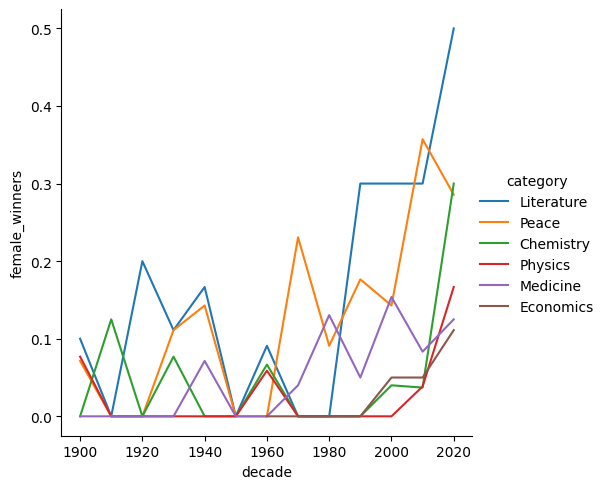

In [ ]:
# create a relational line plot with multiple categories
sns.relplot(x='decade', y='female_winners', kind='line', hue = "category", data= nobel_female)
plt.show()

In [ ]:
# filtering for female winners
female = nobel[nobel['female_winners'] == True]

# sort values by decade
female_decade = female.sort_values(by = "decade", ascending = True)

In [ ]:
first_woman_name, first_woman_category = female_decade['full_name'].values[0], female_decade['category'].values[0]

print(first_woman_name, ":" , first_woman_category)

Marie Curie, née Sklodowska : Physics


In [ ]:
count_winners = nobel['full_name'].value_counts(sort = True)
count_winners = pd.DataFrame(count_winners)
count_winners.rename(columns = {'full_name':'count'}, inplace = True)
count_winners

,count
full_name,
Comité international de la Croix Rouge (International Committee of the Red Cross),3
Linus Carl Pauling,2
John Bardeen,2
Frederick Sanger,2
"Marie Curie, née Sklodowska",2
...,...
Karl Ziegler,1
Giulio Natta,1
Giorgos Seferis,1


In [ ]:
repeat_list = list(count_winners[count_winners['count'] >= 2].index)
repeat_list

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'John Bardeen',
 'Frederick Sanger',
 'Marie Curie, née Sklodowska',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)']